In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import imdb
from keras import optimizers
from keras import losses
from keras import metrics


def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5920 - binary_accuracy: 0.6898 - val_loss: 0.3838 - val_binary_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3201 - binary_accuracy: 0.9030 - val_loss: 0.3107 - val_binary_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2259 - binary_accuracy: 0.9284 - val_loss: 0.2937 - val_binary_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1808 - binary_accuracy: 0.9429 - val_loss: 0.2735 - val_binary_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1384 - binary_accuracy: 0.9593 - val_loss: 0.2809 - val_binary_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1188 - binary_accuracy: 0.9646 - val_loss: 0.2918 - val_binary_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [3]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

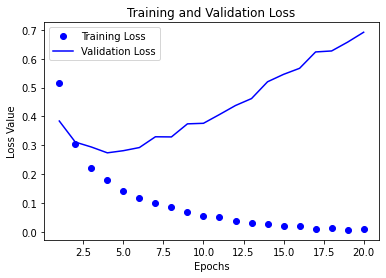

In [4]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

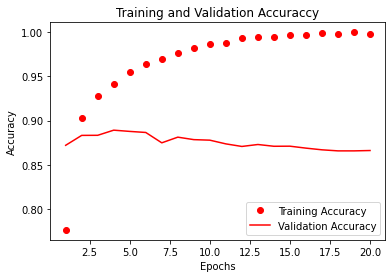

In [5]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()